<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
  <IMG SRC = "https://www.corrosionalliance.com/wp-content/uploads/2021/06/nebest.png" WIDTH=250 ALIGN="left">
<figure>


# Reuse of hollow core slabs
*Developed by Thijs Noordhoek*
> The reuse potentials of hollow core slab floors concerning technical, environmental, and econimical aspects.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import *
from ipywidgets import HBox
import pandas as pd 
from pandas import read_csv
from IPython.display import  display, clear_output
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots

# Input parameters 

In [2]:
stl = {'description_width': '210px'}

#### Dimensions and equipment  

In [3]:
spann = widgets.BoundedIntText(value = '5400', min =0, max = 15000, step =1, description = 'Span in mm:', disabled = False,style = stl)
heightt = widgets.Dropdown(options=['150', '200', '260', '320', '400'], value='200', description='Height of element in mm:', disabled=False,style = stl)
widthh = widgets.BoundedIntText(value = '1200', min =0, max = 2000, step =1, description = 'Width in mm:', disabled = False, style = stl)
holess = widgets.BoundedIntText(value = '7', min =0, max = 25, step =1, description = 'Number of holes:', disabled = False,  style = stl)
holediaa = widgets.BoundedIntText(value = '117', min =0, max = 500, step =1, description = 'Diameter of holes in mm:', disabled = False,  style = stl)
tftopp = widgets.BoundedIntText(value = '35', min =0, max = 500, step =1, description = 'Thickness topflenge in mm:', disabled = False,  style = stl)
structopp = widgets.BoundedIntText(value = '0', min =0, max = 500, step =1, description = 'Thickness structural topping in mm:', disabled = False,  style = stl)
areaa = widgets.BoundedIntText(value = '250', min =0, max = 50000, step =1, description = 'Desired reuse area in m2:', disabled = False,  style = stl)
cranetypee = widgets.Dropdown(options=['Diesel', 'Hybrid'], value='Diesel', description='Crane type used for hoisiting:', disabled=False,style = stl)

aa = widgets.HBox([spann,heightt, widthh])
bb = widgets.HBox([holess, holediaa, tftopp])
cc = widgets.HBox([structopp,areaa, cranetypee])
display(aa,bb,cc)

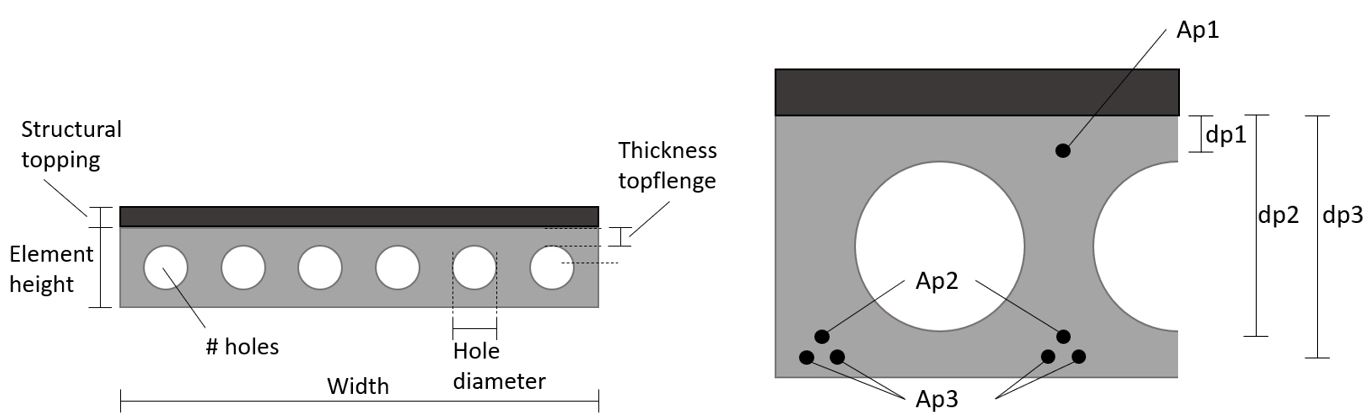

#### Reinforcement and prestressing

In [4]:
pm00 = widgets.BoundedIntText(value = '1100', min =0, max = 2000, step =1, description = 'Prestressing in N/mm2:', disabled = False, style = stl)
App1 = widgets.BoundedIntText(value = '50', min =0, max = 1000, step =1, description = 'Ap1 in mm2:', disabled = False, style = stl)
App2 = widgets.BoundedIntText(value = '100', min =0, max = 1000, step =1, description = 'Ap2 in mm2:', disabled = False, style = stl)
App3 = widgets.BoundedIntText(value = '300', min =0, max = 1000, step =1, description = 'Ap3 in mm2:', disabled = False, style = stl)
dpp1 = widgets.BoundedIntText(value = '50', min =0, max = 750, step =1, description = 'dp1 in mm:', disabled = False, style = stl)
dpp2 = widgets.BoundedIntText(value = '120', min =0, max = 750, step =1, description = 'dp2 in mm:', disabled = False, style = stl)
dpp3 = widgets.BoundedIntText(value = '160', min =0, max = 750, step =1, description = 'dp3 in mm:', disabled = False, style = stl)

dd = widgets.HBox([App1, App2, App3])
ee = widgets.HBox([dpp1, dpp2, dpp3])
ff = widgets.HBox([pm00])
display(dd,ee,ff)

#### Material quality and loads 

In [5]:
concreteq = widgets.Dropdown(options=['C12/15', 'C16/20', 'C20/25','C25/30' , 'C30/37', 'C35/45', 'C40/50', 'C45/55' , 'C50/60'], value='C30/37', description='Concrete quality:', disabled=False,style = stl)
steelq = widgets.Dropdown(options=['Y1030H','Y1670C','Y1770C','Y1860S7'], value='Y1860S7', description='Steel quality:', disabled=False,style = stl)
variablee = widgets.BoundedIntText(value = '2', min =0, max = 10, step =0.1, description = 'Variable load in kN/m2:', disabled = False, style = stl)
deadd = widgets.BoundedIntText(value = '0', min =0, max = 10, step =0.1, description = 'Deadweight in kN/m2:', disabled = False, style = stl)
classs = widgets.Dropdown(options=['CC1','CC2','CC3'], value='CC1', description='Consequence Class:', disabled=False,style = stl)

gg = widgets.HBox([concreteq, steelq, variablee])
hh = widgets.HBox([deadd, classs])
display(gg,hh)

In [6]:
button_send = widgets.Button(
                description='Get results!',
                tooltip='Send',
                style={'description_width': 'initial'}
            )

output = widgets.Output()

def on_button_clicked(event):
    with output:
        clear_output()
        os.system('clear')
        span = spann.value
        width = widthh.value
        height = int(heightt.value)
        holes =holess.value
        holedia = holediaa.value
        f = tftopp.value
        topping = structopp.value
        area = int(areaa.value)
        cranetype = cranetypee.value
        σp0 = pm00.value
        Ap1 = App1.value
        Ap2 = App2.value
        Ap3= App3.value
        dp1 = dpp1.value
        dp2 = dpp2.value
        dp3 = dpp3.value
        concrete = concreteq.value
        steel = steelq.value
        variable = variablee.value
        dead = deadd.value
        Class = classs.value
        
        if concrete == 'C12/15':
            fck = 12
            fcd = fck/1.5
            Ecm = 27000
            fctm = 1.6
            fctk05 = 1.1
        if concrete == 'C16/20':
            fck = 16
            fcd = fck/1.5
            Ecm = 29000
            fctm = 1.9
            fctk05 = 1.3
        if concrete == 'C20/25':
            fck = 20
            fcd = fck/1.5
            Ecm = 30000
            fctm = 2.2
            fctk05 = 1.5
        if concrete == 'C25/30':
            fck = 25
            fcd = fck/1.5
            Ecm = 31000
            fctm = 2.6
            fctk05 = 1.8
        if concrete == 'C30/37':
            fck = 30
            fcd = fck/1.5
            Ecm = 33000
            fctm = 2.9
            fctk05 = 2
        if concrete == 'C35/45':
            fck = 35
            fcd = fck/1.5
            Ecm = 34000
            fctm = 3.2
            fctk05 = 2.2
        if concrete == 'C40/50':
            fck = 40
            fcd = fck/1.5
            Ecm = 35000
            fctm = 3.5
            fctk05 =  2.5
        if concrete == 'C45/55':
            fck = 45
            fcd = fck/1.5
            Ecm = 36000
            fctm = 3.8
            fctk05 = 2.7
        if concrete == 'C50/60':
            fck = 50
            fcd = fck/1.5
            Ecm = 37000
            fctm = 4.1
            fctk05 = 2.9
        fctd = fctk05/1.5        
       
        Ɛc3 = 1.75/1000
        Ɛcu3 =  3.5/1000       
        if steel == 'Y1030H':
            fpk = 1030
            fpd = 843
            Ep = 205000
        if steel == 'Y1670C':
            fpk = 1670
            fpd = 1366
            Ep = 205000    
        if steel == 'Y1770C':
            fpk = 1770
            fpd = 1448
            Ep = 205000
        if steel == 'Y1860S7':
            fpk = 1860
            fpd = 1522
            Ep = 195000
        
        εud = 35/1000
        Ac = width*height - 0.25*holedia**2*np.pi*holes
        Ic = width*height**3/12-holes*np.pi*(holedia/2)**4/4
        S = width*height/2*height/4 - holes*0.5*np.pi*0.25*holedia**2*4*holedia/2/(3*np.pi)
        bw = width-holes*holedia 
        ep1 = dp1 - height/2
        ep2 = dp2 - height/2
        ep3 = dp3 - height/2
        Aptot = Ap1+Ap2+Ap3
        dptot = ((Ap1*dp1)+(Ap2*dp2)+(Ap3*dp3))/Aptot
        σpinf = σp0*0.8
        σpm0 = σp0*Aptot/Ac
        σpminf = σpinf*Aptot/Ac
        pm0 = σp0*Aptot 
        pminf = σpinf*Aptot
        selfweight = Ac/1000000*24   #kN/m
        deadweight = dead*width/1000 + topping/1000*width/1000*24 #kN/m
        variableload = variable*width/1000 #kN/m
        
        if Class == 'CC1':
            CC = 0.9
        if Class == 'CC2':
            CC = 1
        if Class == 'CC3':
            CC = 1.1
              
        ULSload = (1.35 *(selfweight+deadweight) + 1.5 * variableload) * CC #kN/m
        Ved = span*ULSload/2/1000 #kN
        Med = 0.125*ULSload*(span/1000)**2- pminf*(dptot-height/2)/1000000#kNm
        SLSload = ((selfweight+deadweight) + variableload) #kN/m
        VedSLS = span*SLSload/2/1000 #kN
        MedSLS = 0.125*SLSload*(span/1000)**2- pminf*(dptot-height/2)/1000000 #kNm
        def NCfunc(xu):
            if xu/2 < f and xu > f: 
                NC = xu/2*fcd*width+(f-xu/2)*fcd/(xu/2)*(xu-f)*width+(f-xu/2)*(fcd-fcd/(xu/2)*(xu-f))*0.5*width+0.5*(xu-f)*fcd/(xu/2)*(xu-f)*bw
            if xu <= f:
                NC = 0.75*fcd*xu*width
            if xu/2 > f:
                NC = f*fcd*width + (xu/2-f)*fcd*bw + xu/2*fcd*0.5*bw
            return NC
        def Betafunc(xu): 
            if xu/2 < f: 
                A = fcd*xu/2*width
                B = (f-xu/2)*(fcd/(xu/2)*(xu-f)) * width  
                C = (fcd - (fcd/(xu/2)*(xu-f)))*(f-xu/2) * 0.5 * width 
                D = (fcd/(xu/2)*(xu-f)) * (xu-f)* 0.5 * bw
                beta = (A*0.5*xu/2 + B*(xu/2 + (f-xu/2)/2) + C*(xu/2+(f-xu/2)/3) + D*(f+(xu-f)/3))/(A+B+C+D)
                β = beta/xu
            if xu/2 > f:
                A = fcd*f*width 
                B = fcd * (xu/2-f)* bw
                C = fcd*xu/2*0.5*bw
                beta = (A*0.5*f+B*((xu/2-f)*0.5+f)+C*(xu/2+xu/6))/ (A+B+C)
                β = beta/xu
            return β

        def ΔPfunc(xu):
            Δεp = (dptot-xu)/xu*Ɛcu3
            εptot = σpinf/Ep+ Δεp
            eps = fpd/Ep
            σp = fpd + ((εptot-eps)/(εud - eps)) * (fpk/1.1 - fpd)
            ΔP = σp*Aptot - pminf
            return ΔP
        #### Cracking moment (Mr)
        Mr = (fctm+σpminf)*Ic/(height/2)
        datasum = 0
        number = 0
        for i in np.linspace(0.1,height,100000):
            NC = NCfunc(i)
            ΔP = ΔPfunc(i)
            if 0.999 < NC/(ΔP+pminf) < 1.001:
                datasum += i 
                number += 1 
        xu = datasum/number
        εptot = (σpinf/Ep+ (dptot-xu)/xu*Ɛcu3)*1000
        NC = NCfunc(xu)
        ΔP = ΔPfunc(xu)
        Mrd = (pminf * (height/2 - Betafunc(xu)*xu) + ΔP * (dptot - Betafunc(xu)*xu))/1000000
        UCM = Med/Mrd
        if height < 200:
            k = 2
        if height >= 200:
            k = 1 + (200/height)**0.5
        vrdc= 0.035 * k **(3/2)*fck**0.5
        ved = Ved*1000/(height*bw)
        UCved = ved/vrdc
        αl = 0.5
        σcp = pminf/Ac
        Vrdc =  Ic*bw/S* (fctd**2 + αl*σcp*fctd)**0.5/1000 #kN
        UCVed = Ved/Vrdc
        ep = dptot - 0.5*height
        Mvsp = pminf*ep
        w = 5/384*ULSload*span**4/(Ecm*Ic) + 2/16*Mvsp*span**2/(Ecm*Ic)
        wmax = 0.004*span
        UCw = w/wmax
        sawspeed = 5.4 
        hoistspeed = 1/0.24 #elements per hour
        amount = round(area/(width/1000*span/1000))
        if topping ==0:
            sawlength = (2*width/1000)*amount
        else:
            sawlength =  (6/5 * span/1000 + 2*width/1000)*amount   
        hours = sawlength/sawspeed
        MKIsawing = hours*4.7805 #Value is taken from the NMD
        hours2 = amount*0.24 
        if cranetype == 'Diesel':
            hoist = 15.935    #Value is taken from the NMD
        if cranetype == 'Hybrid':
            hoist = 11.1545   #Value is taken from the NMD
        MKIhoisting = hours2*hoist
        thickness =str(height) +' mm'
        
        if thickness == '150 mm':
            MKIvalue = 2.82
        if thickness == '200 mm':
            MKIvalue = 3.18   
        if thickness == '260 mm':
            MKIvalue = 4.37
        if thickness == '320 mm':
            MKIvalue = 5.29
        if thickness == '400 mm':
            MKIvalue = 6.39
        
        MKInew = area*MKIvalue
        costnew = area*80
        costtrad = area*55.03
        costsaw = sawlength*65.5
        coststamp = area*8.22
        hoistcost = amount*61.14
        #mapping the reinforcement
        mapping = area*0.74
        #drilling cores
        cores = 6*63
        #testing
        testing = 6*70
        #chopping 
        chop = 6*175
        #steel
        steel = 6*245 
        test = mapping+cores+testing+chop+steel
        costcirc = (costsaw+coststamp+hoistcost+test)
        fig = plt.figure(figsize=[8,6])
        ax = fig.add_axes([0,0,1,1])
        labels = ['UCM', 'UCved', 'UCVed', 'UCw']
        UCs = [UCM, UCved, UCVed, UCw]
        plt.title('UC values')
        colors = [0,0,0,0]
        for i in range(len(UCs)):
            if UCs[i] < 1:
                colors[i] = 'green'
            else:
                colors[i]= 'red'

        ax.bar(labels, UCs, color = colors)
        plt.axhline(1, color = 'red', linestyle = 'dashed', label = 'Maxumum UC = 1')
        plt.legend(loc = 'best')
        plt.show()
        plt.figure(figsize=[8,6])
        plt.bar([0],[MKIsawing], bottom = [0], align = 'center', color = ['green'], label = 'ECI related to sawing')
        plt.bar([0],[ MKIhoisting], bottom = [MKIsawing], align = 'center', color = ['blue'], label = 'ECI related to hoisting')
        plt.bar([1],[ MKInew], bottom = [0], align = 'center', color = ['purple'], label = 'ECI of new floor')
        plt.xticks ([0,1] , ['ECI of reused floor', 'ECI of new floor']);
        plt.ylabel ('ECI in €')
        plt.title ('Envrionmental impact of reused and new floor')
        plt.legend(loc='best');
        plt.figure(figsize=[15,5.5])
        plt.subplot(1,2,1)
        plt.bar([0],[costsaw], bottom = [0], align = 'center', color = ['yellow'], label = 'Sawing costs')
        plt.bar([0],[hoistcost], bottom = [costsaw], align = 'center', color = ['blue'], label = 'Hoisting costs')
        plt.bar([0],[test], bottom = [costsaw+hoistcost], align = 'center', color = ['green'], label = 'Testing costs')
        plt.bar([0],[coststamp], bottom = [costsaw+hoistcost+test], align = 'center', color = ['orange'], label = 'Stamping costs')
        plt.bar([1],[costtrad], bottom = [0], align = 'center', color = ['brown'], label = 'Costs of traditional demolition')
        plt.bar([2],[costnew], bottom = [0], align = 'center', color = ['purple'], label = 'Costs of new floor')
        plt.xticks ([0,1,2] , ['Costs of reused floor', 'Traditional demolition', 'Cost of new floor']);
        plt.ylabel ('Costs in €')
        plt.title ('Costs of reused and new floor')
        plt.legend(loc='best');
        plt.subplot(1,2,2)
        plt.bar([0],[costsaw+hoistcost+test-costtrad], bottom = [0], align = 'center', color = ['grey'], label = 'Ruesed costs - traditional demolition')
        plt.bar([1],[costnew], bottom = [0], align = 'center', color = ['purple'], label = 'Costs of new floor')
        plt.xticks ([0,1,] , ['Reused - traditional', 'Cost of new floor']);
        plt.ylabel ('Costs in €')
        plt.title ('Costs of reused and new floor')
        plt.legend(loc='best');
        show_inline_matplotlib_plots()
        print('The potential benefit, when combining environmental impact and costs, is: €',MKInew-MKIsawing-MKIhoisting-(costsaw+hoistcost+test+coststamp-costnew-costtrad) )

        km = (MKInew-MKIsawing-MKIhoisting)/0.05/0.12
        wereld = round(km/40000)
        print('The amount of CO2 which is potentially saved equals' ,wereld , 'trips around the world by car.'  )
        
        mix = round((span*Ac/1000000000*2400/(width*span/1000000))*area/2400/10)
        print('When the floor elements are reused, there is no need to produce' ,mix , 'truck mixers full of new concrete.'  )
        
        
button_send.on_click(on_button_clicked)

vbox_result = widgets.VBox([button_send, output])
display(vbox_result)  